# Grafovi - Networkx

In [2]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python39\\share'
Consider using the `--user` option or check the permissions.



In [57]:
import networkx as nx
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

**Neusmereni grafovi**

In [7]:
G = nx.Graph()
G.add_node('a')
G.add_node('b')
G.add_node('c')
G.add_node('d')
G.add_node('e')
G.add_edge('a', 'b')
G.add_edge('b', 'e')
G.add_edge('b', 'c')
G.add_edge('c', 'e')
G.add_edge('a', 'd')

In [8]:
G.nodes()

NodeView(('a', 'b', 'c', 'd', 'e'))

In [9]:
G.edges()

EdgeView([('a', 'b'), ('a', 'd'), ('b', 'e'), ('b', 'c'), ('c', 'e')])

In [10]:
nx.info(G)

'Graph with 5 nodes and 5 edges'

In [12]:
G.degree()

DegreeView({'a': 2, 'b': 3, 'c': 2, 'd': 1, 'e': 2})

In [18]:
for i in G.neighbors('a'):
    print(i)

b
d


In [19]:
G.remove_node('a')

In [20]:
# G.clear()

In [24]:
G.add_edge('a', 'c', weight = 0.3)
G.add_edge('b', 'a', weight = 0.4)

weighted_edges = [('a', 'd', 0.2), ('a', 'e', 0.6)]
G.add_weighted_edges_from(weighted_edges)

G.add_edge('a', 'f', weight = 0.3, color = 'red', description = 'long edge')

In [25]:
G.nodes['a']

{}

In [26]:
G.nodes.data()

NodeDataView({'b': {}, 'c': {}, 'd': {}, 'e': {}, 'a': {}, 'f': {}})

In [27]:
G.edges.data()

EdgeDataView([('b', 'e', {}), ('b', 'c', {}), ('b', 'a', {'weight': 0.4}), ('c', 'e', {}), ('c', 'a', {'weight': 0.3}), ('d', 'a', {'weight': 0.2}), ('e', 'a', {'weight': 0.6}), ('a', 'f', {'weight': 0.3, 'color': 'red', 'description': 'long edge'})])

In [28]:
G.edges['a', 'f']

{'weight': 0.3, 'color': 'red', 'description': 'long edge'}

In [30]:
G.degree(weight = 'weight')

DegreeView({'b': 2.4, 'c': 2.3, 'd': 0.2, 'e': 2.6, 'a': 1.8, 'f': 0.3})

In [34]:
G_small = nx.Graph()
G_small.add_node('a')
G_small.add_node('b')
G_small.add_node('c')
G_small.add_weighted_edges_from([('a', 'b', 0.5), ('a', 'c', 0.1), ('a', 'd', 0.2)])
G_small.degree()

DegreeView({'a': 3, 'b': 1, 'c': 1, 'd': 1})

In [35]:
G_small.degree(weight = 'weight')

DegreeView({'a': 0.8, 'b': 0.5, 'c': 0.1, 'd': 0.2})

In [36]:
nx.write_gml(G, 'demo_graph.gml')

In [37]:
!cat 'demo_graph.gml'

'cat' is not recognized as an internal or external command,
operable program or batch file.


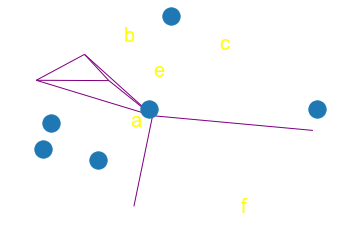

In [41]:
nx.draw_networkx_nodes(G, nx.spring_layout(G))
nx.draw_networkx_labels(G, nx.spring_layout(G), font_color='yellow', font_size=20, font_family='arial')
nx.draw_networkx_edges(G, nx.spring_layout(G), G.edges(), width=1, edge_color='purple')
plt.axis('off')
plt.show()

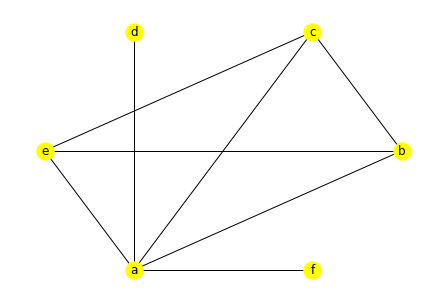

In [44]:
nx.draw_circular(G, with_labels = True, node_color = 'yellow')

**Usmereni grafovi**

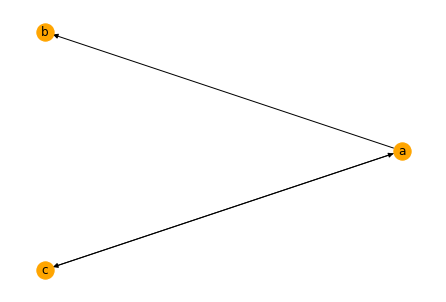

In [46]:
Gd = nx.DiGraph()
Gd.add_weighted_edges_from([('a', 'b', 0.3), ('a', 'c', 0.8), ('c', 'a', 0.6)])
nx.draw_circular(Gd, with_labels = True, node_color = 'orange')

In [49]:
for n in Gd.successors('a'):
    print(n)

b
c


In [50]:
for n in Gd.predecessors('a'):
    print(n)

c


**PageRank**

In [51]:
scores = nx.pagerank(Gd, alpha = 0.9)

In [52]:
scores

{'a': 0.42871846743364384, 'b': 0.19794859797294945, 'c': 0.37333293459340655}

**Shortest path**

In [54]:
# Najkraće rastojanje između dva čvora grafa se može dobiti funkcijom shortest_path.

nx.shortest_path(Gd, source = 'a', target = 'c')

['a', 'c']

**Matrica povezanosti**

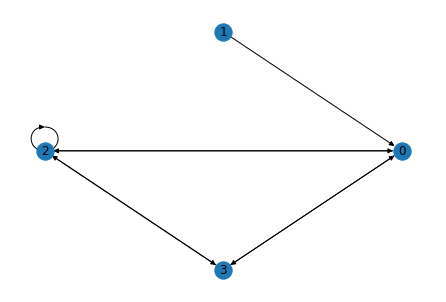

In [58]:
link_matrix = np.matrix([
    [0, 0, 1, 0.5], 
    [1.0 / 3, 0, 0, 0],
    [1.0 / 3, 0, 0.5, 0.5], 
    [1.0 / 3, 0, 0.5, 0]
])

Gm = nx.from_numpy_matrix(link_matrix, create_using = nx.DiGraph)
nx.draw_circular(Gm, with_labels = True)